395
焊接位置/mm： 22.2 19.8
[302.37931034482756, 125.31034482758622]
圆半径 9.441469660233082 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.55 ± 0.01, 13.82 ± 0.06)
Circle radius (r_scaled/mm): 9.44 ± 0.06


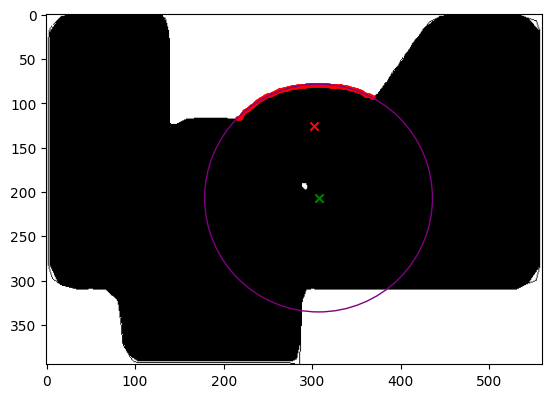

In [10]:
# 单个拟合
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
# from scipy.optimize import curve_fit

def circle(x, cx, cy, r):
    return np.sqrt(r**2 - (x - cx)**2) + cy

# 读取黑白图片
image = cv2.imread('./cropped/cropped_p4-1_0016.bmp', cv2.IMREAD_GRAYSCALE)
width, length = image.shape
print(width)

# 定义特定区域的边界框 [start_row:end_row, start_col:end_col]

start_row, end_row = 70, 150  # 请根据实际情况调整
start_col, end_col = 215, 370
# imgcrop = image.crop((start_row, start_col, end_row, end_col))
# plt.imshow(imgcrop)

# 裁剪图像
cropped_image = image[start_row:end_row, start_col:end_col]
plt.imshow(cropped_image)
# 获取裁剪后图像的形状
rows, cols = cropped_image.shape

# 存储每列的第一个黑色点的坐标
first_black_pixels = []

# 遍历每一列
for col in range(cols):
    # 找到当前列中第一个黑色点的行坐标
    black_pixel_row = np.argmax(cropped_image[:, col] == 0)
    
    # 如果找到了黑色点，则记录坐标
    if black_pixel_row > 0:  # 0 表示未找到黑色点
        # 转换坐标为完整图像坐标
        full_image_row =width - (start_row + black_pixel_row)
        first_black_pixels.append((start_col + col, full_image_row))

# 将坐标转换为 NumPy 数组
first_black_pixels = np.array(first_black_pixels)
# print(first_black_pixels)

# 进行圆形拟合
# p0 = [np.mean(first_black_pixels[:, 0]), np.mean(first_black_pixels[:, 1]), 10.0]  # 初始猜测值
p0 = [350, 250, 150.0]  # 初始猜测值
params, covariance = curve_fit(circle, first_black_pixels[:, 0], first_black_pixels[:, 1], p0=p0)

# 提取拟合结果
cx, cy, r = params

# 生成拟合曲线的 x 值范围
fit_x = np.linspace(min(first_black_pixels[:, 0]), max(first_black_pixels[:, 0]), 100)

# 计算拟合曲线的 y 值
fit_y = circle(fit_x, cx, cy, r)

# 显示图像
plt.imshow(image, cmap='gray')

# 在坐标轴上画出每列的第一个黑色点的位置
plt.scatter(first_black_pixels[:, 0], width-first_black_pixels[:, 1], color='red', s=5)
# 画出拟合圆
# plt.plot(fit_x, fit_y, color='blue')
circle_patch = Circle((cx, width-cy), r, color='purple', fill=False)
plt.gca().add_patch(circle_patch)


scale_factor = 29 / width  # 将369像素映射到29mm

# 标记圆心位置
plt.scatter(cx, width-cy, color='green', marker='x')

p1= [9.2, 13.8]
p1_scaled=[0,0]
p1_scaled[0] = (p1[0]+13)/scale_factor
p1_scaled[1] = width - (p1[1]+6)/scale_factor 

print( "焊接位置/mm：", p1[0]+13, p1[1]+6) 
print(p1_scaled)
plt.scatter(p1_scaled[0], p1_scaled[1], color='red', marker='x')

# # 显示图像、黑色像素位置和拟合圆
# plt.axis('equal')
# plt.show()

print("圆半径",r*scale_factor,"mm")


scaled_first_black_pixels = first_black_pixels * scale_factor
# p0_scaled = [175 * scale_factor, 60 * scale_factor, 150.0 * scale_factor]  # 初始猜测值
p0_scaled = [p * scale_factor for p in p0]
params_scaled, covariance_scaled = curve_fit(circle, scaled_first_black_pixels[:, 0], scaled_first_black_pixels[:, 1], p0=p0_scaled)
# 计算标准偏差作为拟合误差的估计
fit_errors = np.sqrt(np.diag(covariance_scaled))
print(f"Circle center (cx_scaled/mm, cy_scaled/mm): ({cx*scale_factor:.2f} ± {fit_errors[0]:.2f}, {cy*scale_factor:.2f} ± {fit_errors[1]:.2f})")
print(f"Circle radius (r_scaled/mm): {r*scale_factor:.2f} ± {fit_errors[2]:.2f}")

395


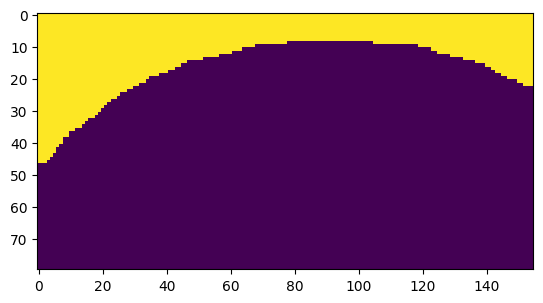

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
# from scipy.optimize import curve_fit

def circle(x, cx, cy, r):
    return np.sqrt(r**2 - (x - cx)**2) + cy

# 读取黑白图片
image = cv2.imread('./cropped/cropped_p4-1_0016.bmp', cv2.IMREAD_GRAYSCALE)
width, length = image.shape
print(width)

# 定义特定区域的边界框 [start_row:end_row, start_col:end_col]

start_row, end_row = 70, 150  # 请根据实际情况调整
start_col, end_col = 215, 370
# imgcrop = image.crop((start_row, start_col, end_row, end_col))
# plt.imshow(imgcrop)

# 裁剪图像
cropped_image = image[start_row:end_row, start_col:end_col]
plt.imshow(cropped_image)

400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.931902525426938 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.00 ± 0.03, 14.06 ± 0.15)
Circle radius (r_scaled/mm): 8.93 ± 0.14
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.798954718388595 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.01 ± 0.03, 14.19 ± 0.16)
Circle radius (r_scaled/mm): 8.80 ± 0.15


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.748192007690129 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.05 ± 0.03, 14.24 ± 0.15)
Circle radius (r_scaled/mm): 8.75 ± 0.14
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.60455974908573 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.13 ± 0.02, 14.39 ± 0.13)
Circle radius (r_scaled/mm): 8.60 ± 0.12
400


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.42753060011513 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.20 ± 0.02, 14.56 ± 0.12)
Circle radius (r_scaled/mm): 8.43 ± 0.11
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.496884484026266 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.28 ± 0.02, 14.49 ± 0.11)
Circle radius (r_scaled/mm): 8.50 ± 0.10
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


圆半径 8.243247321111948 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.38 ± 0.02, 14.76 ± 0.11)
Circle radius (r_scaled/mm): 8.24 ± 0.10
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 7.981308834387918 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.49 ± 0.02, 15.04 ± 0.11)
Circle radius (r_scaled/mm): 7.98 ± 0.10
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.226166862233239 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.67 ± 0.02, 14.80 ± 0.10)
Circle radius (r_scaled/mm): 8.23 ± 0.09


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.70857546846198 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.94 ± 0.03, 14.32 ± 0.13)
Circle radius (r_scaled/mm): 8.71 ± 0.12
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.838410405497402 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.06 ± 0.03, 14.19 ± 0.13)
Circle radius (r_scaled/mm): 8.84 ± 0.12
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.822329067585665 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.13 ± 0.03, 14.21 ± 0.12)
Circle radius (r_scaled/mm): 8.82 ± 0.11
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.10168382969066 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.19 ± 0.02, 13.91 ± 0.11)
Circle radius (r_scaled/mm): 9.10 ± 0.10
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.194915570293755 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.24 ± 0.02, 13.81 ± 0.09)
Circle radius (r_scaled/mm):

C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.277970595829233 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.34 ± 0.02, 13.58 ± 0.09)
Circle radius (r_scaled/mm): 9.28 ± 0.09
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.013366278812788 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.24 ± 0.02, 13.79 ± 0.07)
Circle radius (r_scaled/mm): 9.01 ± 0.07
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.945910839612287 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.27 ± 0.02, 13.83 ± 0.08)
Circle radius (r_scaled/mm): 8.95 ± 0.07
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.99348747443575 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.29 ± 0.02, 13.73 ± 0.09)
Circle radius (r_scaled/mm): 8.99 ± 0.08
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.965539605280982 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.26 ± 0.02, 13.71 ± 0.09)
Circle radius (r_scaled/mm)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.233262367739622 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.19 ± 0.03, 12.89 ± 0.15)
Circle radius (r_scaled/mm): 9.23 ± 0.14
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.340499193486275 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.20 ± 0.03, 12.75 ± 0.15)
Circle radius (r_scaled/mm): 9.34 ± 0.14
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.571145049653662 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.25 ± 0.04, 12.49 ± 0.16)
Circle radius (r_scaled/mm): 9.57 ± 0.15
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.74476682137113 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.25 ± 0.04, 12.28 ± 0.17)
Circle radius (r_scaled/mm): 9.74 ± 0.16
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 9.896750924693292 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (22.22 ± 0.04, 12.07 ± 0.18)
Circle radius (r_scaled/mm): 9.

C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 8.055740341974186 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.97 ± 0.07, 14.07 ± 0.29)
Circle radius (r_scaled/mm): 8.06 ± 0.26
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 7.2739904869462615 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.75 ± 0.07, 15.10 ± 0.26)
Circle radius (r_scaled/mm): 7.27 ± 0.23
400


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 7.122427107307003 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.77 ± 0.07, 15.25 ± 0.25)
Circle radius (r_scaled/mm): 7.12 ± 0.22
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 7.199896974334128 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.78 ± 0.07, 15.17 ± 0.26)
Circle radius (r_scaled/mm): 7.20 ± 0.23
400


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 7.172788141346693 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.76 ± 0.08, 15.19 ± 0.27)
Circle radius (r_scaled/mm): 7.17 ± 0.23
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 6.949140121947501 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.68 ± 0.07, 15.48 ± 0.25)
Circle radius (r_scaled/mm): 6.95 ± 0.22
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


圆半径 6.775420682710467 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.67 ± 0.07, 15.71 ± 0.22)
Circle radius (r_scaled/mm): 6.78 ± 0.18
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 6.670296025412889 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.64 ± 0.07, 15.83 ± 0.22)
Circle radius (r_scaled/mm): 6.67 ± 0.18
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 6.537617742792793 mm


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


Circle center (cx_scaled/mm, cy_scaled/mm): (21.63 ± 0.06, 16.03 ± 0.20)
Circle radius (r_scaled/mm): 6.54 ± 0.16
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 6.558371694915362 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.63 ± 0.06, 15.96 ± 0.20)
Circle radius (r_scaled/mm): 6.56 ± 0.17
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 6.873833659790959 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.66 ± 0.07, 15.40 ± 0.23)
Circle radius (r_scaled/mm): 6.87 ± 0.19
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 6.342055075767055 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.51 ± 0.06, 16.22 ± 0.20)
Circle radius (r_scaled/mm): 6.34 ± 0.16
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 6.400611415677868 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.52 ± 0.06, 16.16 ± 0.20)
Circle radius (r_scaled/mm): 6.40 ± 0.16
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


圆半径 6.407020399175511 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.46 ± 0.06, 16.21 ± 0.20)
Circle radius (r_scaled/mm): 6.41 ± 0.16
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 6.793413508388809 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.54 ± 0.06, 15.63 ± 0.22)
Circle radius (r_scaled/mm): 6.79 ± 0.19
400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 7.093730600090962 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.59 ± 0.06, 15.25 ± 0.24)
Circle radius (r_scaled/mm): 7.09 ± 0.21


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy
C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


400
焊接位置/mm:  22.2 19.8
[306.2068965517241, 126.89655172413791]
圆半径 7.2865362905261755 mm
Circle center (cx_scaled/mm, cy_scaled/mm): (21.59 ± 0.07, 14.96 ± 0.27)
Circle radius (r_scaled/mm): 7.29 ± 0.23


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2944\3294993877.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


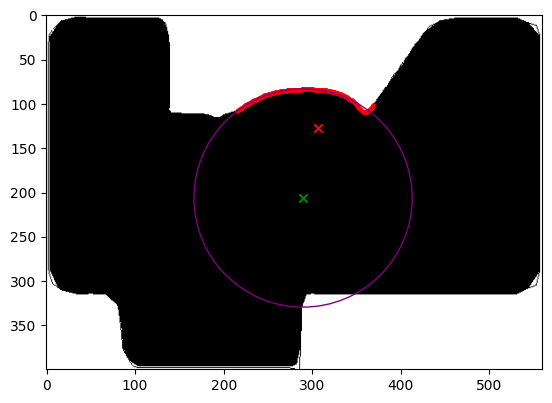

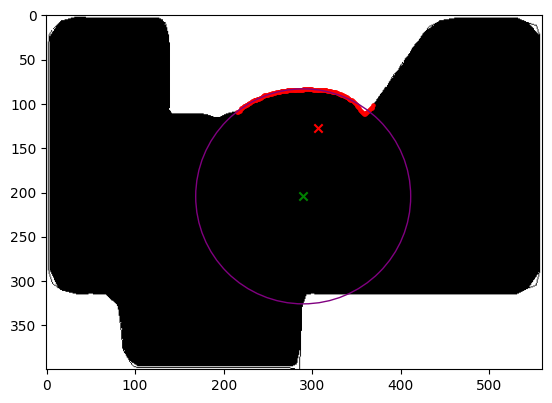

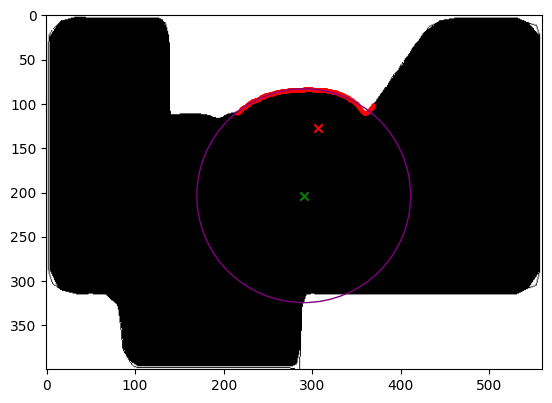

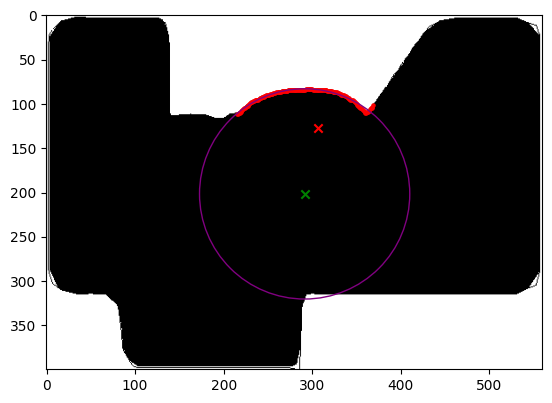

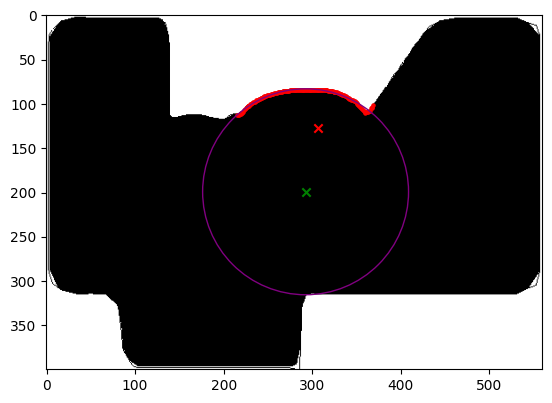

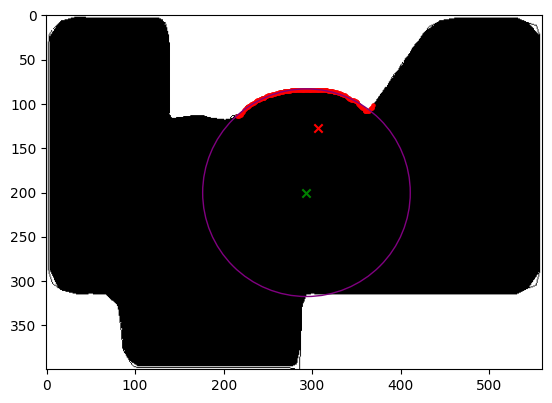

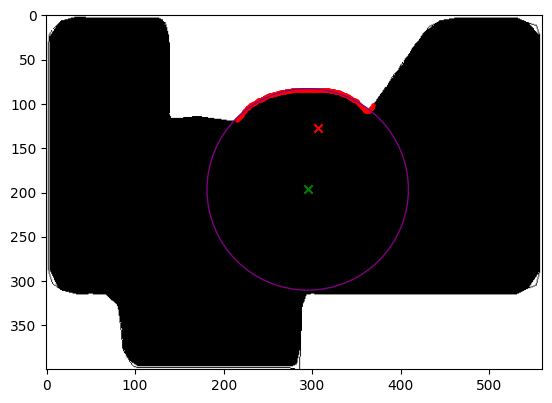

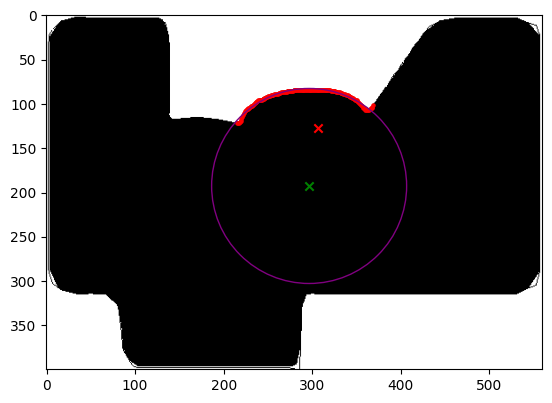

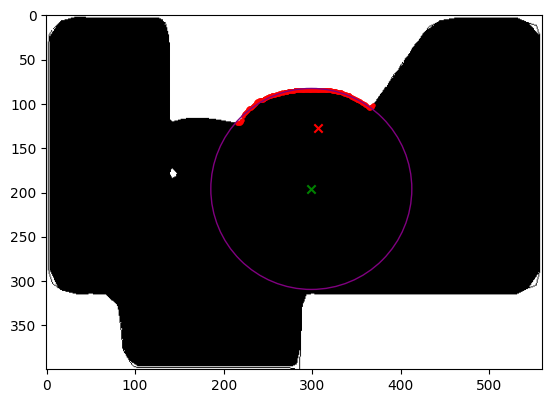

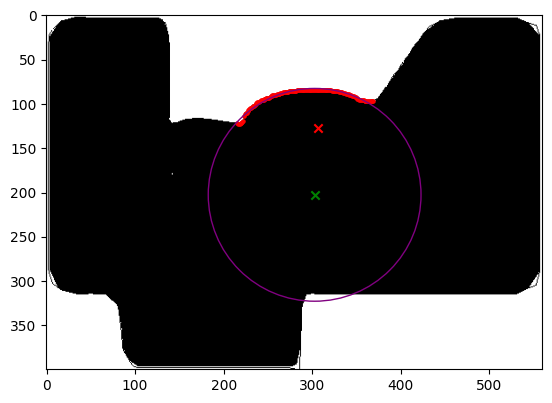

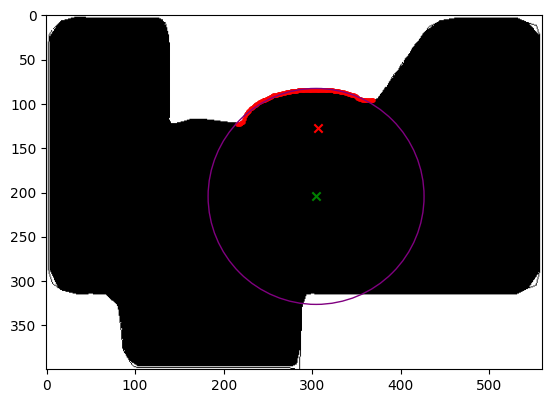

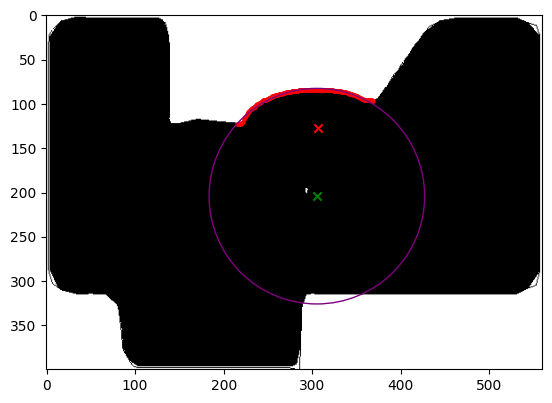

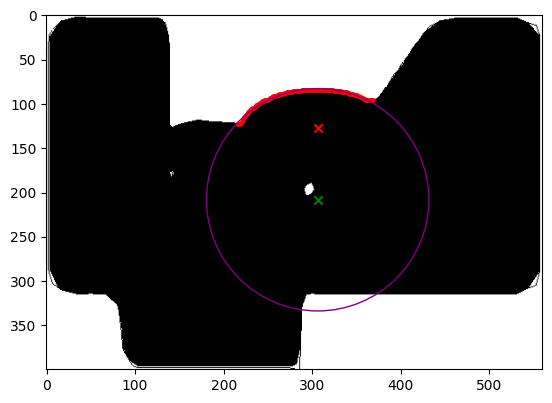

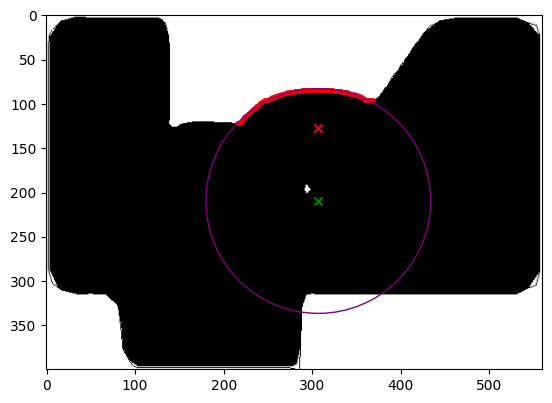

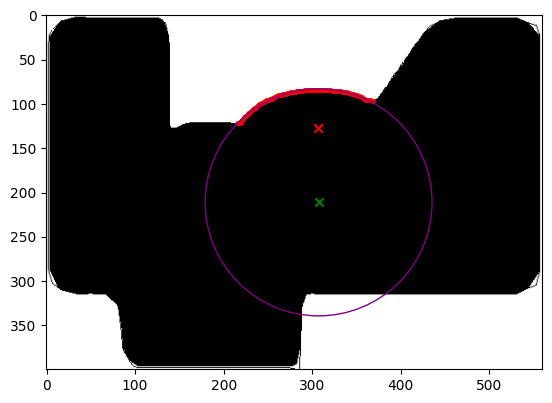

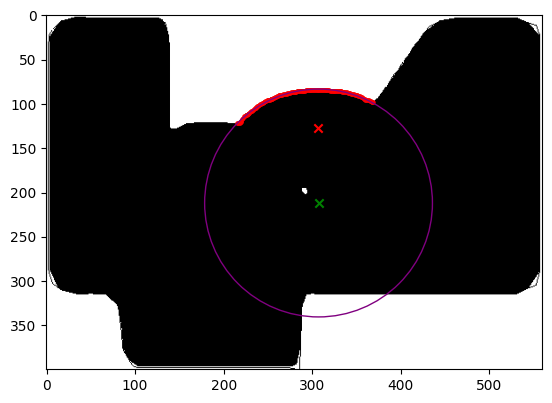

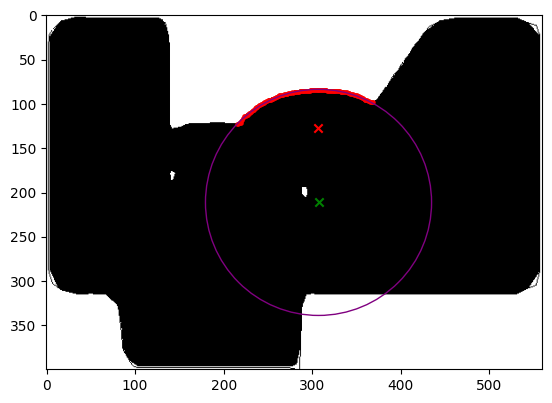

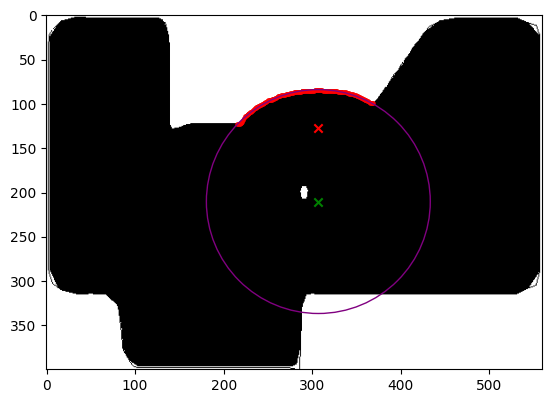

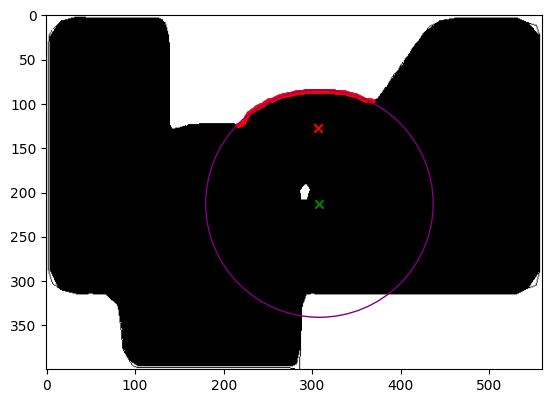

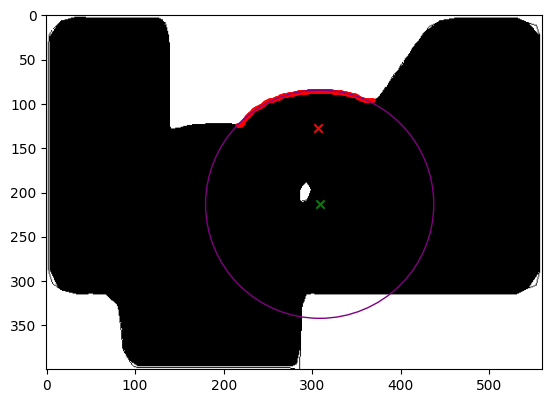

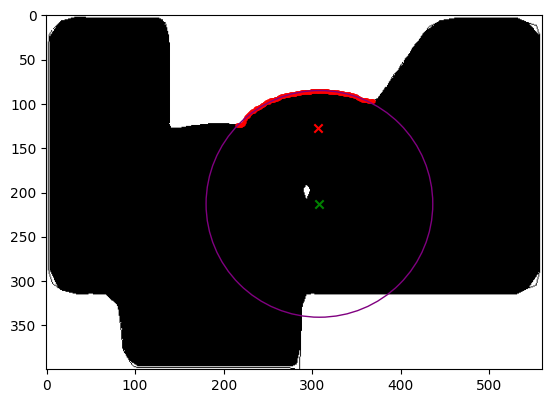

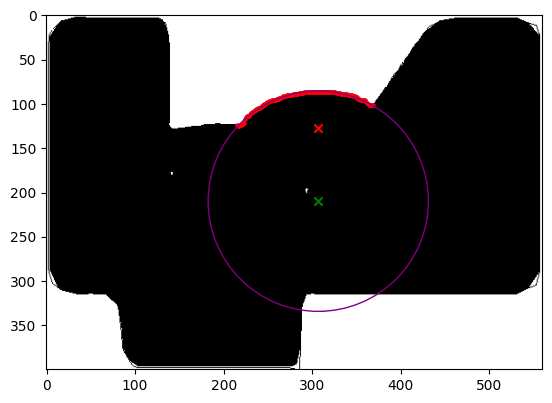

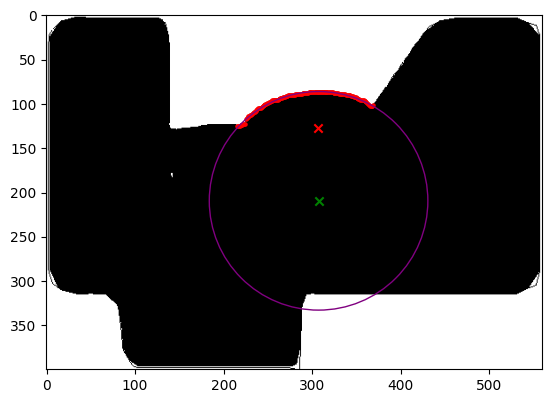

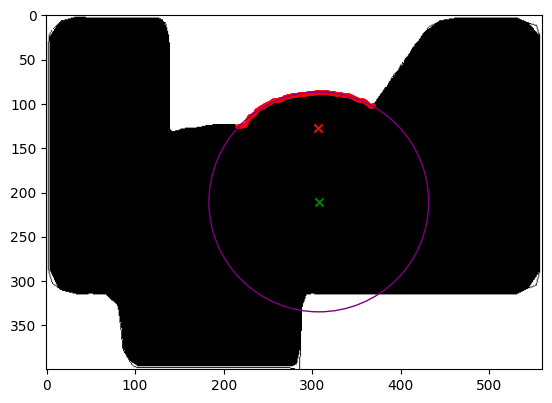

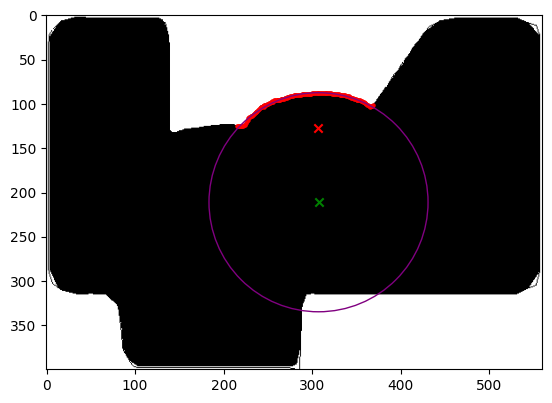

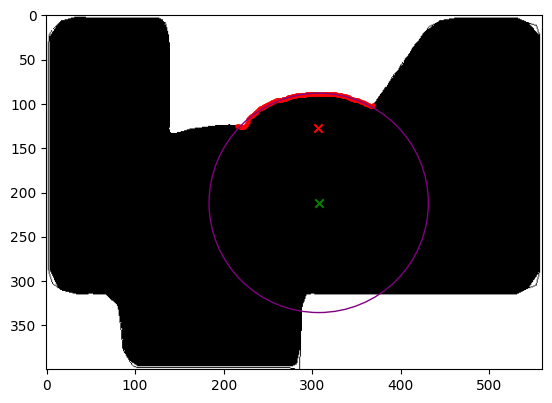

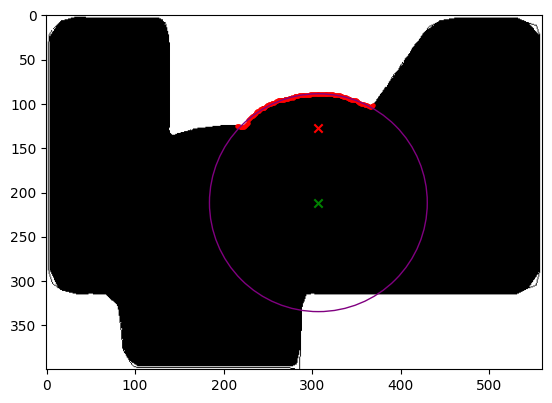

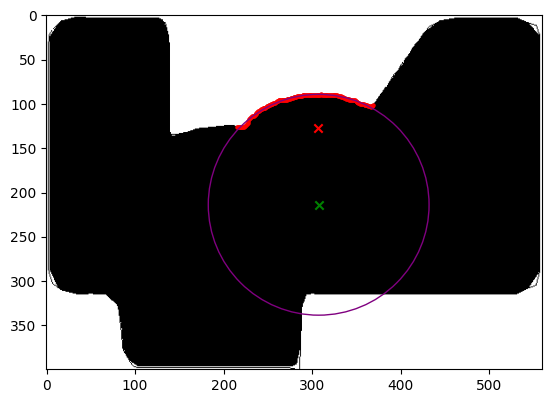

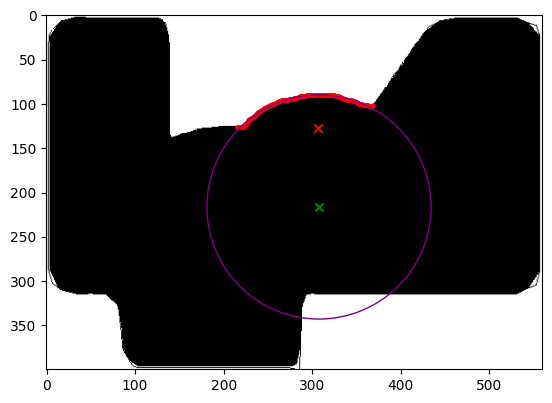

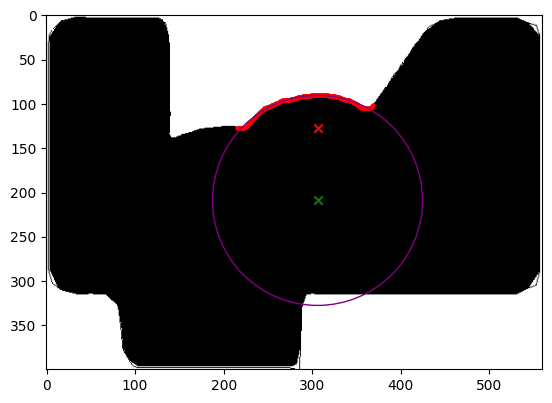

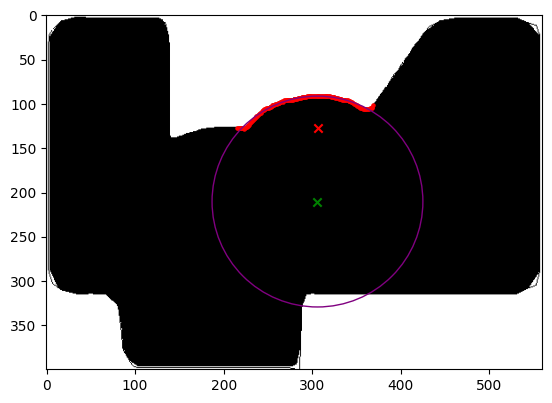

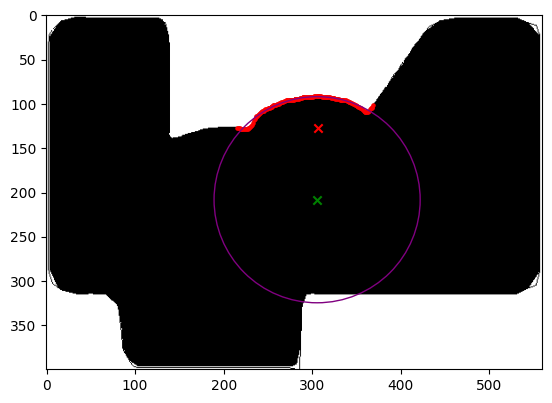

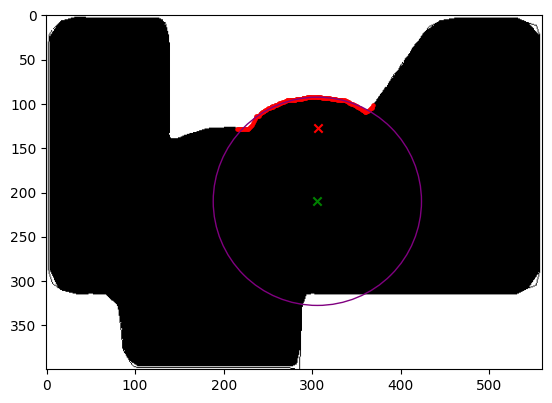

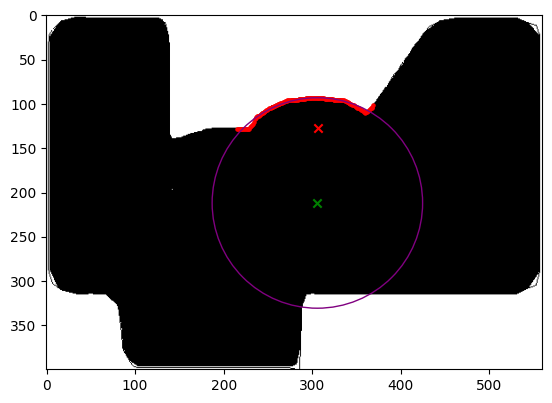

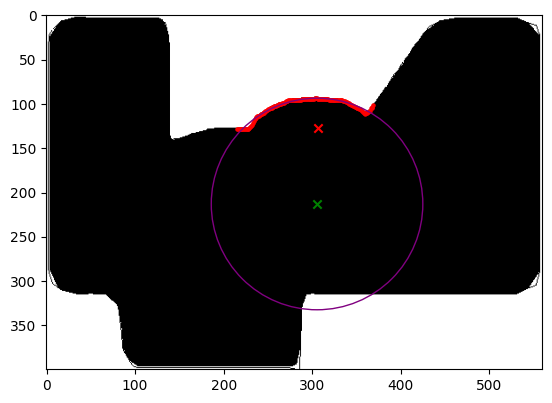

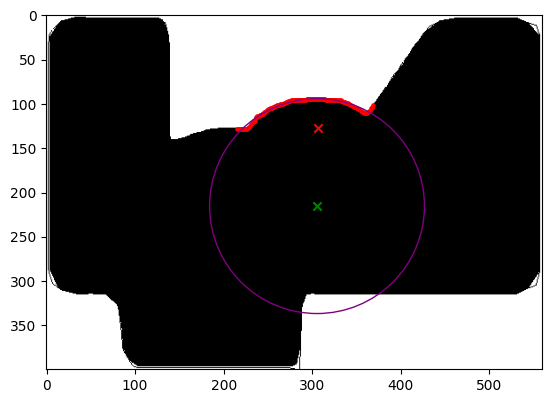

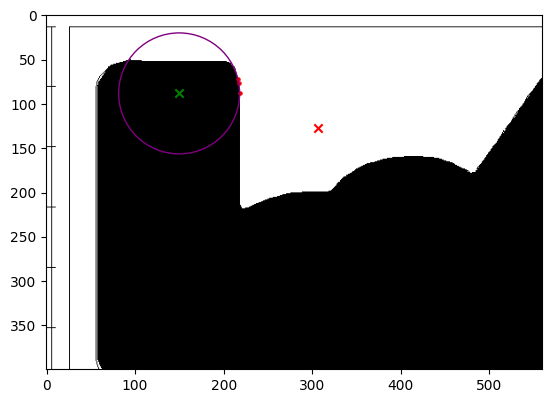

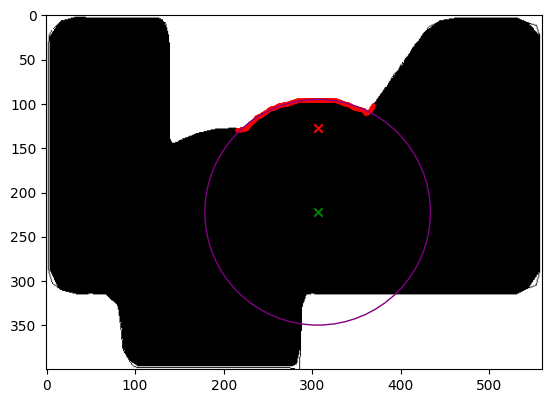

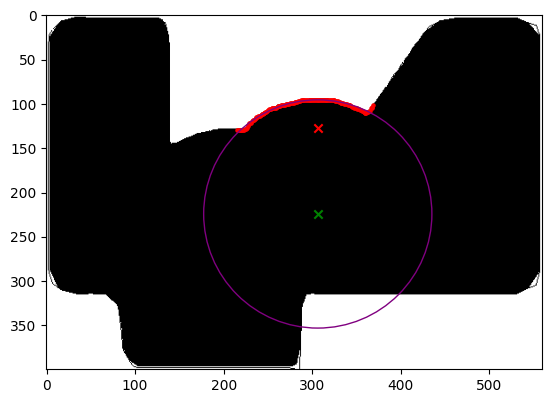

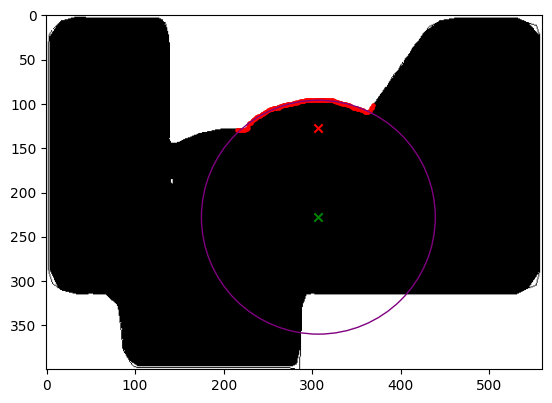

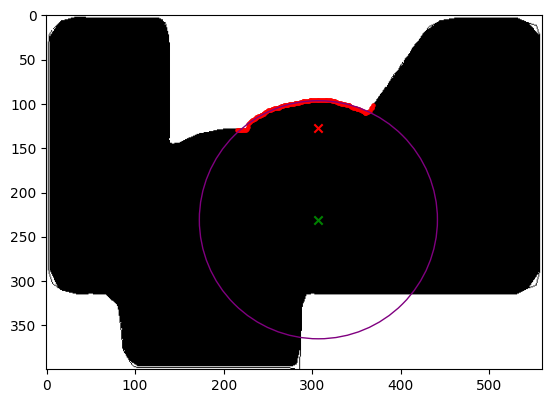

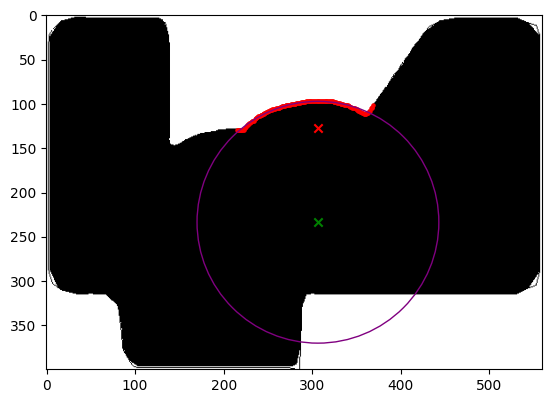

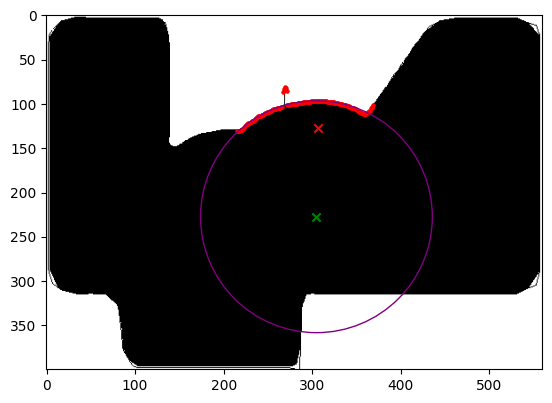

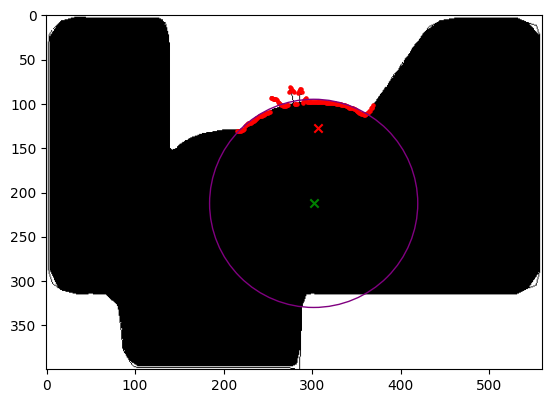

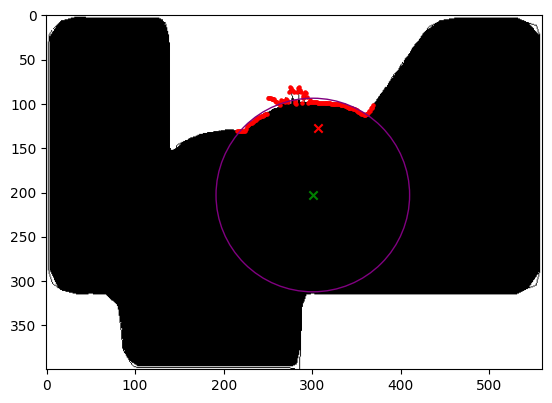

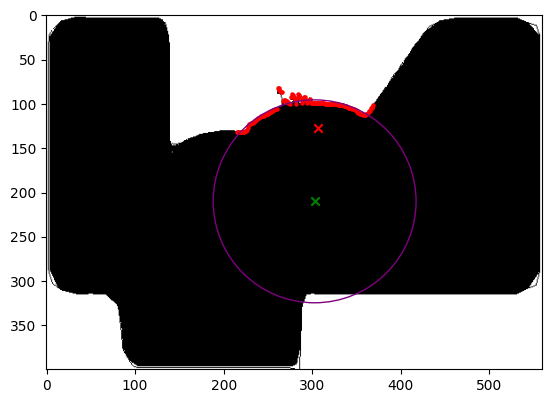

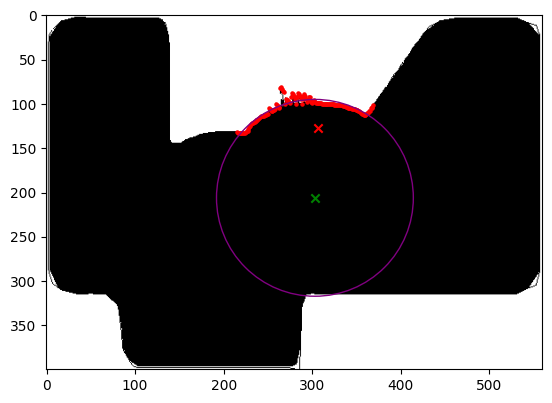

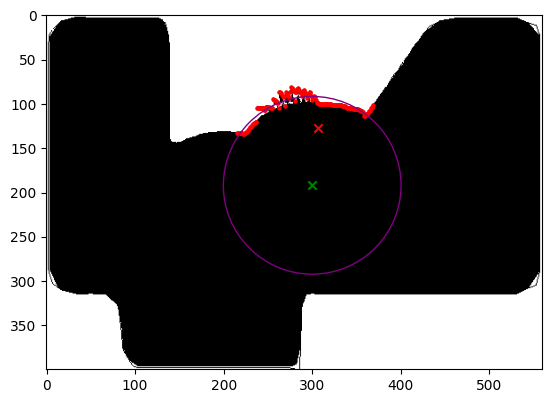

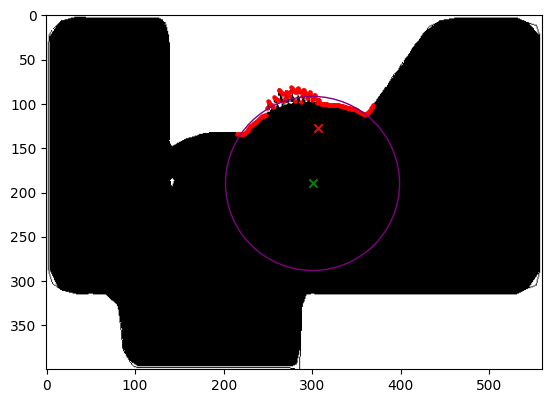

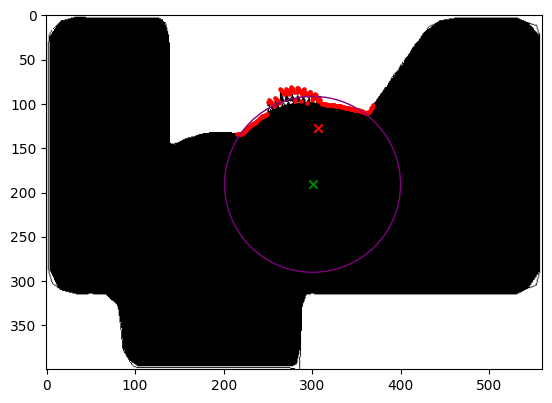

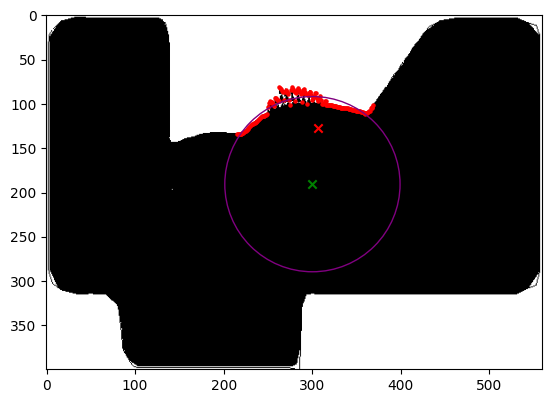

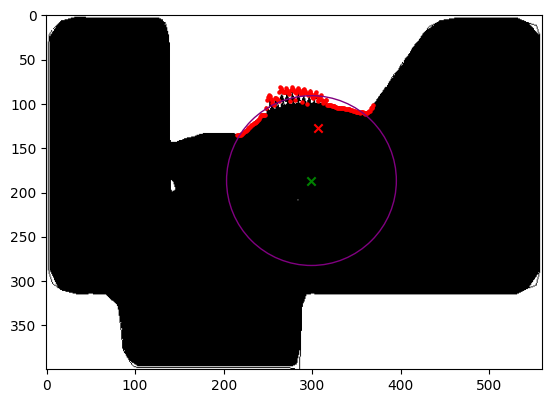

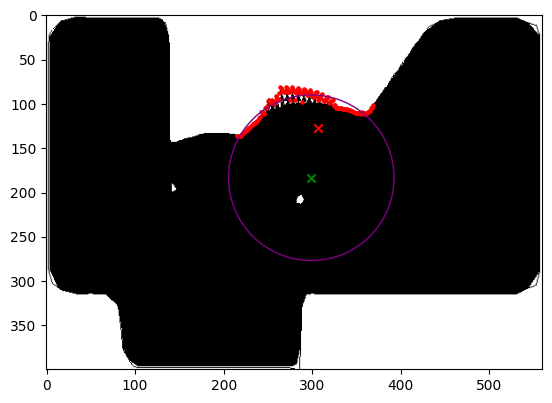

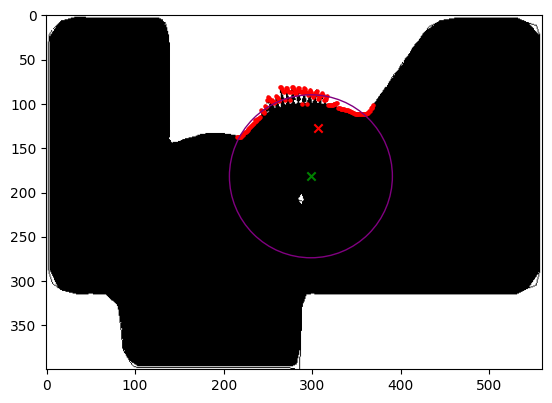

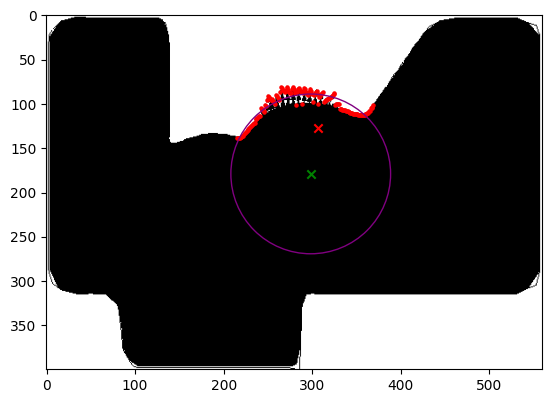

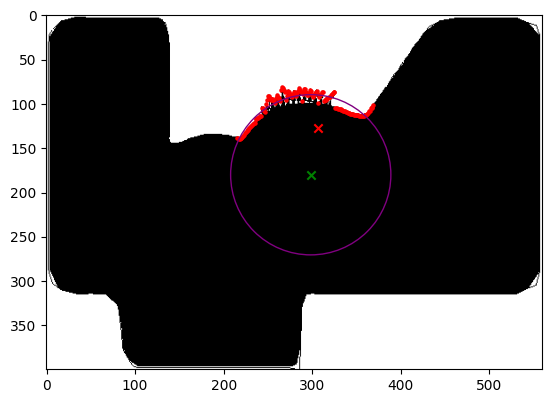

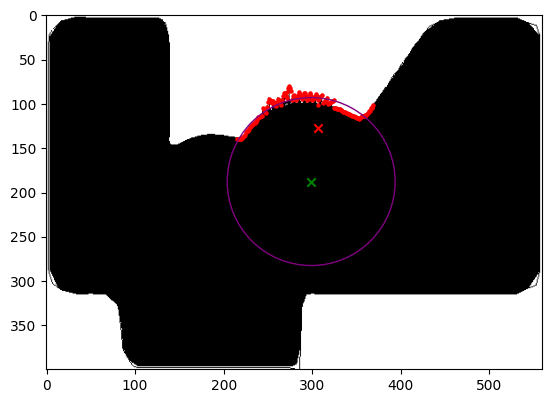

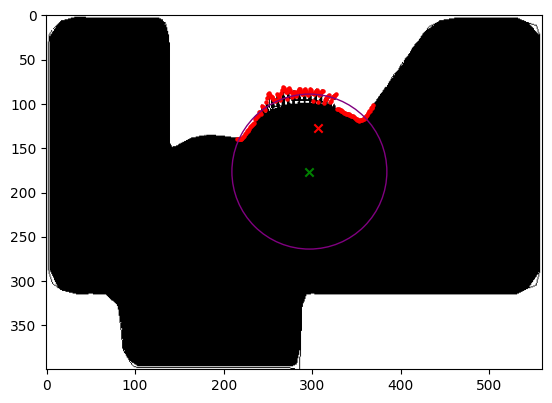

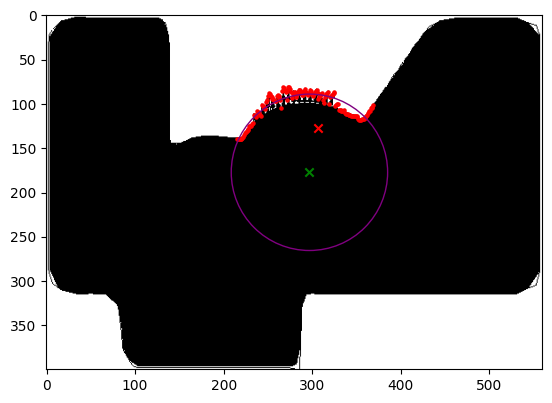

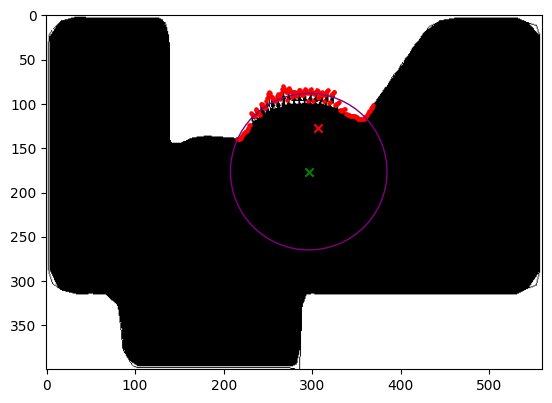

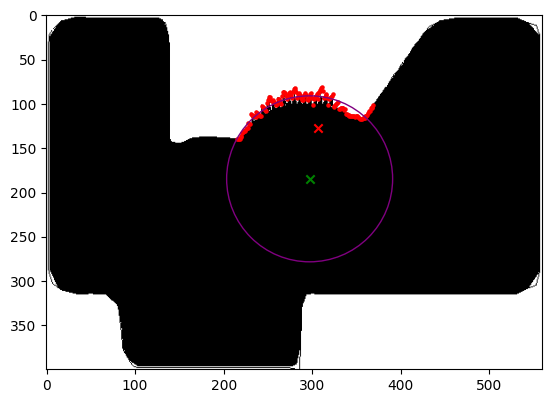

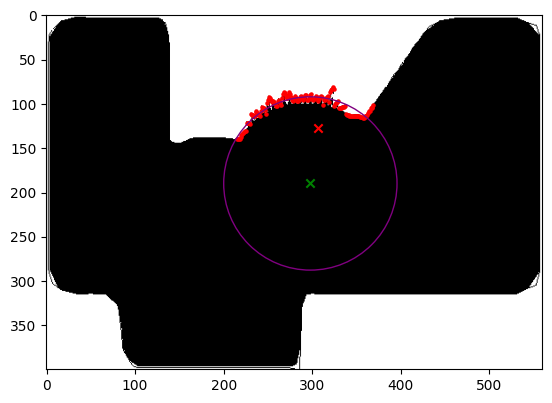

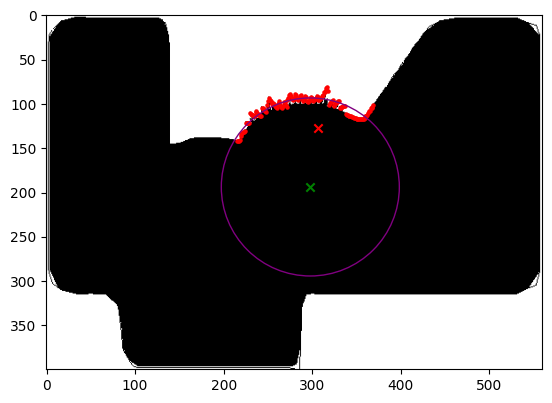

In [12]:
# 批量拟合
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
import os
# from scipy.optimize import curve_fit

def circle(x, cx, cy, r):
    return np.sqrt(r**2 - (x - cx)**2) + cy

# 创建一个列表，用于存储圆心和半径
circle_data = []

# 读取黑白图片
input_folder = './cropped/cropped_p4-1/'
output_folder = './fitted/fitted_p4-1/'
# os.path.join(output_path, 'fitted_'+filename)

for filename in os.listdir(input_folder):

    # 创建一个新的 Figure 对象
    plt.figure()
    image = cv2.imread(os.path.join(input_folder, filename), cv2.IMREAD_GRAYSCALE)
    # image = cv2.imread('./cropped/cropped_p2-1_0015.bmp', cv2.IMREAD_GRAYSCALE)
    width, length = image.shape
    print(width)

    # 定义特定区域的边界框 [start_row:end_row, start_col:end_col]

    start_row, end_row = 70, 150  # 请根据实际情况调整
    start_col, end_col = 215, 370

    # 裁剪图像
    cropped_image = image[start_row:end_row, start_col:end_col]

    # 获取裁剪后图像的形状
    rows, cols = cropped_image.shape

    # 存储每列的第一个黑色点的坐标
    first_black_pixels = []

    # 遍历每一列
    for col in range(cols):
        # 找到当前列中第一个黑色点的行坐标
        black_pixel_row = np.argmax(cropped_image[:, col] == 0)
        
        # 如果找到了黑色点，则记录坐标
        if black_pixel_row > 0:  # 0 表示未找到黑色点
            # 转换坐标为完整图像坐标
            full_image_row =width - (start_row + black_pixel_row)
            first_black_pixels.append((start_col + col, full_image_row))

    # 将坐标转换为 NumPy 数组
    first_black_pixels = np.array(first_black_pixels)
    # print(first_black_pixels)

    # 进行圆形拟合
    # p0 = [np.mean(first_black_pixels[:, 0]), np.mean(first_black_pixels[:, 1]), 10.0]  # 初始猜测值
    p0 = [350, 250, 150.0]  # 初始猜测值
    params, covariance = curve_fit(circle, first_black_pixels[:, 0], first_black_pixels[:, 1], p0=p0)

    # 提取拟合结果
    cx, cy, r = params

    # 生成拟合曲线的 x 值范围
    fit_x = np.linspace(min(first_black_pixels[:, 0]), max(first_black_pixels[:, 0]), 100)
    
    # 计算拟合曲线的 y 值
    fit_y = circle(fit_x, cx, cy, r)

    # 显示图像




    plt.imshow(image, cmap='gray')

    # 在坐标轴上画出每列的第一个黑色点的位置
    plt.scatter(first_black_pixels[:, 0], width-first_black_pixels[:, 1], color='red', s=5)
    # 画出拟合圆
    # plt.plot(fit_x, fit_y, color='blue')
    circle_patch = Circle((cx, width-cy), r, color='purple', fill=False)
    plt.gca().add_patch(circle_patch)


    scale_factor = 29 / width  # 将369像素映射到29mm

    # 标记圆心位置
    plt.scatter(cx, width-cy, color='green', marker='x')

    p1= [9.2, 13.8]
    p1_scaled=[0,0]
    p1_scaled[0] = (p1[0]+13)/scale_factor
    p1_scaled[1] = width - (p1[1]+6)/scale_factor 
    print( "焊接位置/mm: ", p1[0]+13, p1[1]+6) 

    print(p1_scaled)
    plt.scatter(p1_scaled[0], p1_scaled[1], color='red', marker='x')

    # # 显示图像、黑色像素位置和拟合圆
    # plt.axis('equal')
    # plt.show()
    output_filename = os.path.join(output_folder, 'fitted_'+filename.replace('bmp','jpg'))
    plt.savefig(output_filename)
    print("圆半径",r*scale_factor,"mm")


    scaled_first_black_pixels = first_black_pixels * scale_factor
    # p0_scaled = [175 * scale_factor, 60 * scale_factor, 150.0 * scale_factor]  # 初始猜测值
    p0_scaled = [p * scale_factor for p in p0]
    params_scaled, covariance_scaled = curve_fit(circle, scaled_first_black_pixels[:, 0], scaled_first_black_pixels[:, 1], p0=p0_scaled)
    # 计算标准偏差作为拟合误差的估计
    fit_errors = np.sqrt(np.diag(covariance_scaled))
    print(f"Circle center (cx_scaled/mm, cy_scaled/mm): ({cx*scale_factor:.2f} ± {fit_errors[0]:.2f}, {cy*scale_factor:.2f} ± {fit_errors[1]:.2f})")
    print(f"Circle radius (r_scaled/mm): {r*scale_factor:.2f} ± {fit_errors[2]:.2f}")
    circle_data.append((round(cx*scale_factor, 1), round(cy*scale_factor, 1), round(r*scale_factor, 1)))

# 读取文件
with open('predict.txt', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

# 添加新的数据
# for i in range(len(data)):
#     # 如果原有的列数不足6列，用空字符串填充
#     while len(data[i]) < 6:
#         data[i].append('')
    # 添加新的数据
    
# 找到第一个第四、五、六列为空的行的索引
start_index = next((i for i, row in enumerate(data) if all(x == '' for x in row[3:6])), len(data))

# 添加新的数据
for i in range(start_index, start_index + len(circle_data)):
    if i < len(data):
        data[i][3:6] = circle_data[i - start_index]
    else:
        data.append(circle_data[i - start_index] + [''] * (len(data[0]) - 6))

# 写回文件
with open('predict.txt', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(data)


# cv2.imwrite(output_filename, image)